# XP Data Science - Semana 3 - Análise Exploratória

In [60]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as sct
import scipy as sci
from statsmodels.distributions.empirical_distribution import ECDF

-  Aqui estamaos usando as libs 
    -  scipy
        <br><https://docs.scipy.org/doc/scipy/reference/stats.html>
        <br><https://www.scipy.org/>
    -  statsmodels
        <br><https://www.statsmodels.org/stable/index.html>


## Jogando Moedas

In [78]:
def coin_trial():
    heads = 0
    for i in range(100):
        if random.random() <= 0.5:
            heads +=1
    return heads

- Joga uma moeda 100 vezes para cima

In [79]:
def simulate(n):
    trials = []
    for i in range(n):
        trials.append(coin_trial())
    print(trials)
    return(sum(trials)/n)

- Faz a n vezes o jogar de 100 vezes a modea para cima

In [83]:
simulate(10)

[48, 49, 54, 52, 49, 47, 57, 62, 50, 60]


52.8

# Qual melhor vinho em relação a média ?

https://www.kaggle.com/zynicide/wine-reviews/data

### Ainda vamos falar de vinho

In [9]:
!head -n 3 wine-data.csv

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco  (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


- Trás o começo do arquivo

In [97]:
wine_df = pd.read_csv('wine.csv.zip',compression='zip', header=0, sep=',', quotechar='"')
wine_df = wine_df[wine_df.columns[1:]]
wine_df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


- Le direto do zip

### Explorando

In [110]:
wine_df.shape

(129971, 13)

In [12]:
wine_df.variety.unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

### Separando Tokaji e Lambrusco

In [101]:
wine_df_Tokaji = wine_df[wine_df.variety=='Tokaji'].copy()
wine_df_Tokaji.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6575,Hungary,This exuberant Tokaji starts with an enticing ...,Mézes Mály Aszú 6 Puttonyos,94,175.0,Tokaji,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Royal Tokaji 1999 Mézes Mály Aszú 6 Puttonyos ...,Tokaji,Royal Tokaji
9829,Hungary,Honeyed apricot and orange peel on the nose an...,Aszú 5 Puttonyos,89,39.0,Tokaji,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Royal Tokaji 2003 Aszú 5 Puttonyos (Tokaji),Tokaji,Royal Tokaji
25822,Hungary,"Aromas of caramelized pineapple, honey and aca...",Aszú 5 Puttonyos,93,50.0,Tokaji,NaN,NaN,Jeff Jenssen,@worldwineguys,Béres 2007 Aszú 5 Puttonyos (Tokaji),Tokaji,Béres


In [102]:
wine_df_Lambrusco = wine_df[wine_df.variety=='Lambrusco'].copy()
wine_df_Lambrusco.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4539,Italy,"Part of the natural wine movement, this frizzy...",Ferrando,82,21.0,Central Italy,Lambrusco dell'Emilia,NaN,NaN,NaN,Quarticello NV Ferrando (Lambrusco dell'Emilia),Lambrusco,Quarticello
6187,Italy,Black-skinned fruit and violet aromas lead the...,Lambrusco I Quercioli Secco,87,14.0,Central Italy,NaN,NaN,Kerin O’Keefe,@kerinokeefe,Medici Ermete NV Lambrusco I Quercioli Secco L...,Lambrusco,Medici Ermete
9864,Italy,Blackberry jam and plum cake aromas lead the n...,Il Duomo Amabile,86,12.0,Central Italy,Lambrusco di Modena,NaN,Kerin O’Keefe,@kerinokeefe,Cantina di Sorbara NV Il Duomo Amabile (Lambr...,Lambrusco,Cantina di Sorbara


### Olhando para a distribuição de *points*

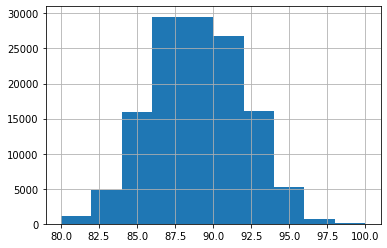

In [103]:
wine_df.points.hist()
plt.show()

- Todos os vinhos

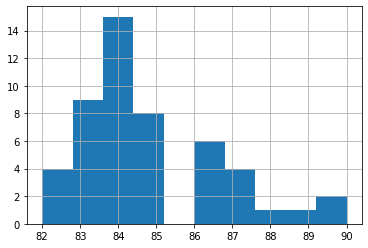

In [104]:
wine_df_Lambrusco.points.hist()
plt.show()

-  Lambrusco

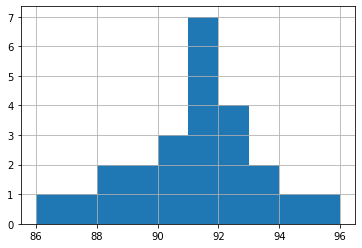

In [105]:
wine_df_Tokaji.points.hist()
plt.show()

Tokaji

#### Mas e como está os valores ?

In [106]:
total_avg = wine_df.points.mean()
total_std = wine_df.points.std()
print("Total- Média: {} / STD: {}".format(total_avg, total_std))

Total- Média: 88.44713820775404 / STD: 3.039730202916003


In [107]:
tokaji_avg = wine_df_Tokaji.points.mean()
tokaji_std = wine_df_Tokaji.points.std()
print("Tokaji - Média: {} / STD: {}".format(tokaji_avg, tokaji_std))

Tokaji - Média: 90.75 / STD: 2.231201664925252


In [108]:
lambrusco_avg = wine_df_Lambrusco.points.mean()
lambrusco_std = wine_df_Lambrusco.points.std()
print("Lambrusco: - Média: {} / STD: {}".format(lambrusco_avg, lambrusco_std))

Lambrusco: - Média: 84.72 / STD: 1.9170555653961432


- O que entendemos ?
- Qual vinho está mais próximo das qualidades totais ?

### Comparando os vinhos 

In [109]:
z = (tokaji_avg - lambrusco_avg) / lambrusco_std
z

3.145448733382933

- Encontramos a probabilidade de um vinho `Tokaji` ser similar ao um vinho `Lambrusco`

In [117]:
sct.norm.cdf(z)

0.9991708387177506

- Chamando a função de ACUMULADA

In [112]:
1 - sct.norm.cdf(z)

0.0008291612822494132

## Falando de funções e distribuções

#### Criando um array

In [118]:
var_arrange = np.arange(-4,4,0.001)
var_arrange

array([-4.   , -3.999, -3.998, ...,  3.997,  3.998,  3.999])

In [119]:
type(var_arrange)

numpy.ndarray

In [120]:
len(var_arrange)

8000

(array([800., 800., 800., 800., 800., 800., 800., 800., 800., 800.]),
 array([-4.0000e+00, -3.2001e+00, -2.4002e+00, -1.6003e+00, -8.0040e-01,
        -5.0000e-04,  7.9940e-01,  1.5993e+00,  2.3992e+00,  3.1991e+00,
         3.9990e+00]),
 <a list of 10 Patch objects>)

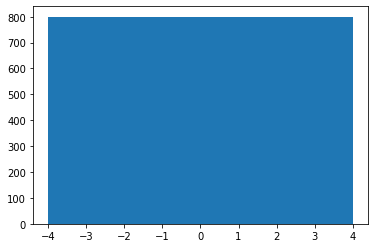

In [121]:
plt.hist(var_arrange)

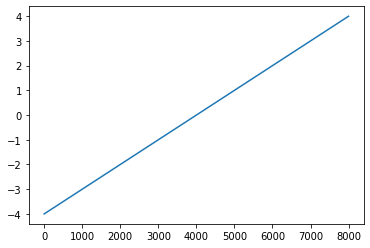

In [122]:
plt.plot(var_arrange)

- Temos um array de 8000 posições
- Indo de -4 a 4 

In [126]:
sct.norm.pdf(var_arrange)

array([0.00013383, 0.00013437, 0.0001349 , ..., 0.00013545, 0.0001349 ,
       0.00013437])

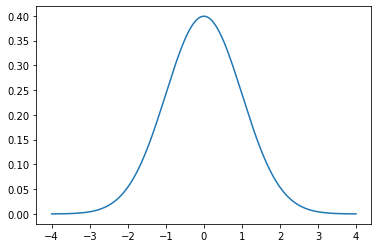

In [124]:
plt.plot(var_arrange, sct.norm.pdf(var_arrange))

In [127]:
sct.norm.pdf(5, 3, 4)

0.08801633169107488

In [128]:
mydist = sct.norm(3, 4)
mydist.pdf(5)

0.08801633169107488

### Empirico CDF

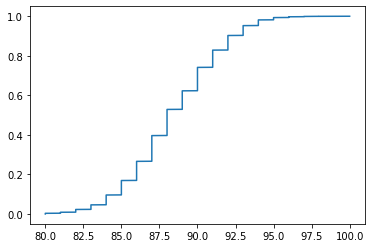

In [129]:
ecdf = ECDF(wine_df.points)
plt.plot(ecdf.x,ecdf.y)

In [130]:
ECDF_df = pd.DataFrame({'points': ecdf.x, 'prob': ecdf.y})
ECDF_df.head(3)

,points,prob
0,-inf,0.000000
1,80.0,0.000008
2,80.0,0.000015


In [144]:
ECDF_df[(ECDF_df.points >=77) & (ECDF_df.points <=87)].prob.max()

0.3961883804848774

In [145]:
ECDF_df[(ECDF_df.points >=77) & (ECDF_df.points <=87)].prob.count()/ECDF_df.prob.count()

0.3961853322254024

### Encontrando a Normal Perfeita!

In [148]:
norm.ppf([0.35, 0.60 , 0.93])

array([-0.38532047,  0.2533471 ,  1.47579103])